In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
datos1 = pd.read_csv(r'/home/alejandro/Documents/Octavo/Intermedio/RayosX/Datos1.csv')
datos2 = pd.read_csv(r'/home/alejandro/Documents/Octavo/Intermedio/RayosX/Datos2.csv')
datos3 = pd.read_csv(r'/home/alejandro/Documents/Octavo/Intermedio/RayosX/Datos3.csv')
datos4 = pd.read_csv(r'/home/alejandro/Documents/Octavo/Intermedio/RayosX/Datos4.csv')

In [14]:
datos1.head()

,Rayos X característicos del cobre,LiF,Ángulo (rad),Intensidad (arb),Unnamed: 4,KBr,Ángulo (rad).1,Intensidad (arb).1
0,NaN,NaN,0.052360,0,NaN,NaN,0.052360,0.0
1,NaN,NaN,0.052535,0,NaN,NaN,0.052535,0.0
2,NaN,NaN,0.052709,0,NaN,NaN,0.052709,0.0
3,NaN,NaN,0.052884,0,NaN,NaN,0.052884,0.0
4,NaN,NaN,0.053058,0,NaN,NaN,0.053058,0.0


In [18]:
dLiF = 2.014e-10
dKBr = 3.29e-10
AngKBr = []
AngLiF = []
ILi = []
IKBr = []
lamLiF = []
lamKBr = []
for i in range(5430):
    AngLiF.append(datos1.iloc[i,2])
    AngKBr.append(datos1.iloc[i,6])
    ILi.append(datos1.iloc[i,3])
    IKBr.append(datos1.iloc[i,7])
    lamLiF.append(2*dLiF*np.sin(AngLiF[i]))
    lamKBr.append(2*dKBr*np.sin(AngKBr[i]))


(0.0, 1.7e-10)

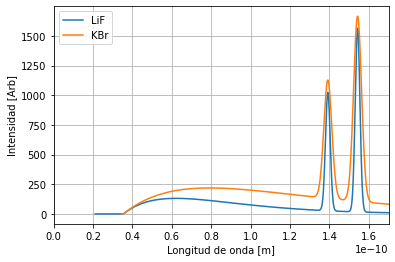

In [28]:
plt.plot(lamLiF,ILi,label = 'LiF')
plt.plot(lamKBr,IKBr, label = 'KBr')
plt.grid()
plt.ylabel('Intensidad [Arb]')
plt.xlabel('Longitud de onda [m]')
plt.legend()
plt.xlim(0,1.7e-10)

In [56]:
#Calculo de máximo global
k1 = 0
k2 = 0
IMax1 = 0
IMax2 = 0
for i in range(len(lamKBr)):
    if ILi[i]>IMax1:
        IMax1 = ILi[i]
        k1 = i
    if IKBr[i]>IMax2:
        IMax2 = IKBr[i]
        k2 = i

In [88]:
#Cálculo del primer máximo
k11 = 0
k22 = 0
IMax11 = 0
IMax22 = 0
for i in range(len(lamKBr)):
    if ILi[i]>IMax11:
        IMax11 = ILi[i]
        k11 = i
    if IKBr[i]>IMax22:
        IMax22 = IKBr[i]
        k22 = i
    if lamLiF[i]>1.5e-10:
        break
        
KalfLiF = lamLiF[k1]
KalfKBr = lamKBr[k2]
KbetaLiF = lamLiF[k11]
KbetaKBr = lamKBr[k22]

In [90]:
#Calculo de desviación 
miti1 = IMax1/2
miti2 = IMax2/2
miti11 = IMax11/2
miti22 = IMax22/2

D11 = D12 = D13 = D14 = D21 = D22 = D23 = D24 = 0


l11 = l12 = l13 = l14 = l21 = l22 = l23 = l24 = 100
for i in range(len(lamKBr)):
    if abs(round(miti1) - ILi[i])<l11 and i<k1:
        D11 = lamLiF[i]
    if abs(round(miti1) - ILi[i])<l12 and i>k1:
        D12 = lamLiF[i]
        
    if abs(round(miti11) - ILi[i])<l13 and i<k11:
        D13 = lamLiF[i]
    if abs(round(miti11) - ILi[i])<l14 and i>k11:
        D14 = lamLiF[i]
        
    if abs(round(miti2) - IKBr[i])<l21 and i<k2:
        D21 = lamKBr[i]
    if abs(round(miti2) - IKBr[i])<l22 and i>k2:
        D22 = lamKBr[i]
        
    if abs(round(miti22) - IKBr[i])<l23 and i<k22:
        D23 = lamKBr[i]
    if abs(round(miti22) - IKBr[i])<l24 and i>k22:
        D24 = lamKBr[i]
        
Delta1 = D12 - D11 #incertidumbre Kalfa LiF
Delta11 = D14 - D13 #incertidumbre Kbeta LiF
Delta2 = D22 - D21 #incertidumbre Kalfa KBr
Delta22 = D24 - D23 #incertidumbre Kbeta KBr

Delta = [Delta1,Delta11,Delta2,Delta22] 

1.5717236050515191e-10 1.5431583760156256e-10
